In [42]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: cannot create directory ‘build’: File exists
Release mode
-- pybind11 v2.2.4
CMAKE_INSTALL_PREFIX=/home/gian/Documents/metnum-1c2020/metodos-tp3-2020c1
-- Configuring done
-- Generating done
-- Build files have been written to: /home/gian/Documents/metnum-1c2020/metodos-tp3-2020c1
make: *** No rule to make target 'install'.  Stop.


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

In [3]:
# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version
import metnum

/home/gian/Documents/metnum-1c2020/metodos-tp3-2020c1/notebooks
Python 3.6.10


In [45]:
df = pd.read_csv('../data/train.csv')

## Predicción de precios

In [4]:
def testLinearRegression(df, xcol, ycol):
    x = df[xcol].values
    y = df[ycol].values

    x = x.reshape(len(x),1)
    y = y.reshape(len(y),1)

    linear_regressor = metnum.LinearRegression(1)

    linear_regressor.fit(x,y)
    df['prediction'] = linear_regressor.predict(x)

    sns.scatterplot(data=df, x=xcol, y=ycol)
    sns.lineplot(data=df, x=xcol, y='prediction', color='red')

    rmsle = mean_squared_log_error(y, df['prediction'])
    rmse = mean_squared_error(y, df['prediction'])

    print(rmse,rmsle)


458016105929.21515 0.18204104605552643


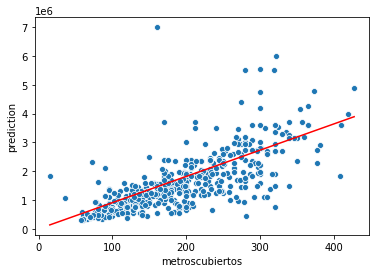

In [5]:
df = pd.read_csv('../data/train.csv')
df = df[df['ciudad']=='Mérida'].dropna()

testLinearRegression(df, 'metroscubiertos', 'precio')


# Predicciónes

In [6]:
df = pd.read_csv('../data/train.csv')
provincias = df['provincia'].unique()
tipos = df['tipodepropiedad'].unique()

In [8]:
df[df['provincia'] == 'Sonora'].corr(method ='pearson') 

,id,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
id,1.000000,-0.015977,-0.022073,0.015598,0.002433,-0.012377,-0.006577,-0.012803,-0.006982,-0.000778,0.015201,0.009068,-0.018679,-0.003543,-0.005715,-0.008650
antiguedad,-0.015977,1.000000,0.109561,0.097425,0.069405,0.106076,0.062649,0.007028,0.042348,-0.046768,-0.008042,-0.008746,-0.069747,0.110175,0.125756,0.013279
habitaciones,-0.022073,0.109561,1.000000,0.174801,0.519226,0.532365,0.366987,0.026504,-0.025154,0.021724,0.048142,0.064528,0.069083,0.063561,0.059074,0.378584
garages,0.015598,0.097425,0.174801,1.000000,0.243705,0.254813,0.168979,0.039682,-0.018915,0.005337,0.092036,0.066470,0.140398,0.160151,0.160356,0.290479
banos,0.002433,0.069405,0.519226,0.243705,1.000000,0.702588,0.520087,0.079516,-0.011823,-0.011591,0.079323,0.057812,0.132841,0.064323,0.071765,0.625439
metroscubiertos,-0.012377,0.106076,0.532365,0.254813,0.702588,1.000000,0.690359,0.087783,-0.033047,0.009726,0.072427,0.043798,0.159279,0.057290,0.058991,0.774214
metrostotales,-0.006577,0.062649,0.366987,0.168979,0.520087,0.690359,1.000000,0.061718,-0.019246,0.008606,0.095557,0.045259,0.133675,0.055284,0.037963,0.645079
idzona,-0.012803,0.007028,0.026504,0.039682,0.079516,0.087783,0.061718,1.000000,-0.041409,0.013541,-0.027538,0.016047,-0.004443,0.018765,0.028593,0.147507
lat,-0.006982,0.042348,-0.025154,-0.018915,-0.011823,-0.033047,-0.019246,-0.041409,1.000000,-0.839037,-0.024609,-0.005889,-0.010582,-0.053557,-0.037267,-0.024635
lng,-0.000778,-0.046768,0.021724,0.005337,-0.011591,0.009726,0.008606,0.013541,-0.839037,1.000000,0.036082,0.001825,0.010814,0.069262,0.060932,0.013112
